In [18]:
import os
import csv
import json

def import_data(total_epochs, n_of_epoch, base_f, folders, parameter_analisys):
    data = []
    full_data = []
    for folder in folders:
        if os.path.isdir(f'{base_f}/{folder}'):
            epoch_dict = {}

            parameter_value = 0
            with open(f'{base_f}/{folder}/simulation_data/1/parameters.json') as jsonfile:
                parameters = json.load(jsonfile)
                parameter_value = parameters[parameter_analisys]
            
            epoch_dict['parameter_value'] = parameter_value
            full_data_dict = {}
            full_data_dict['parameter_value'] = parameter_value
            

            epoch_total_cost = 0
            epoch_action_cost = 0
            epoch_infected = 0
            a1_cont = 0
            a2_cont = 0
            a3_cont = 0
            

            with open(f'{base_f}/{folder}/epoch_data.csv', newline='\n') as csvfile:
                epoch_csv_data = csv.reader(csvfile, delimiter=';')
                full_data_dict['csv_data'] = []
                full_data_dict['pd_csv_data'] = {}
                
                


                for i, row in enumerate(epoch_csv_data):
                    full_data_dict['csv_data'].append(row)
                    if i == 0:
                        for item in row:
                            full_data_dict['pd_csv_data'][item] = []
                    for index, key in enumerate(full_data_dict['pd_csv_data'].keys()):
                        full_data_dict['pd_csv_data'][key].append(row[index])

                    if i >= (total_epochs - n_of_epoch):
                        a1 = float(row[4].replace(',', '.'))
                        a2 = float(row[5].replace(',', '.'))
                        a3 = float(row[6].replace(',', '.'))
                        
    
                        a1_cont += float(row[4].replace(',', '.'))
                        a2_cont += float(row[5].replace(',', '.'))
                        a3_cont += float(row[6].replace(',', '.'))

                        epoch_total_cost += float(row[17].replace(',', '.'))
                        epoch_action_cost += float(row[14].replace(',', '.'))
                        epoch_infected += float(row[2].replace(',', '.'))
            
            epoch_dict['total_cost'] = epoch_total_cost
            epoch_dict['action_cost'] = epoch_action_cost
            epoch_dict['infected'] = epoch_infected
            
            epoch_dict['a1'] = a1_cont / parameters['a_reductionDuration']
            epoch_dict['a2'] = a2_cont / parameters['a_reductionDuration']
            epoch_dict['a3'] = a3_cont / parameters['a_reductionDuration']

            full_data.append(full_data_dict)
            data.append(epoch_dict)
    return data, full_data

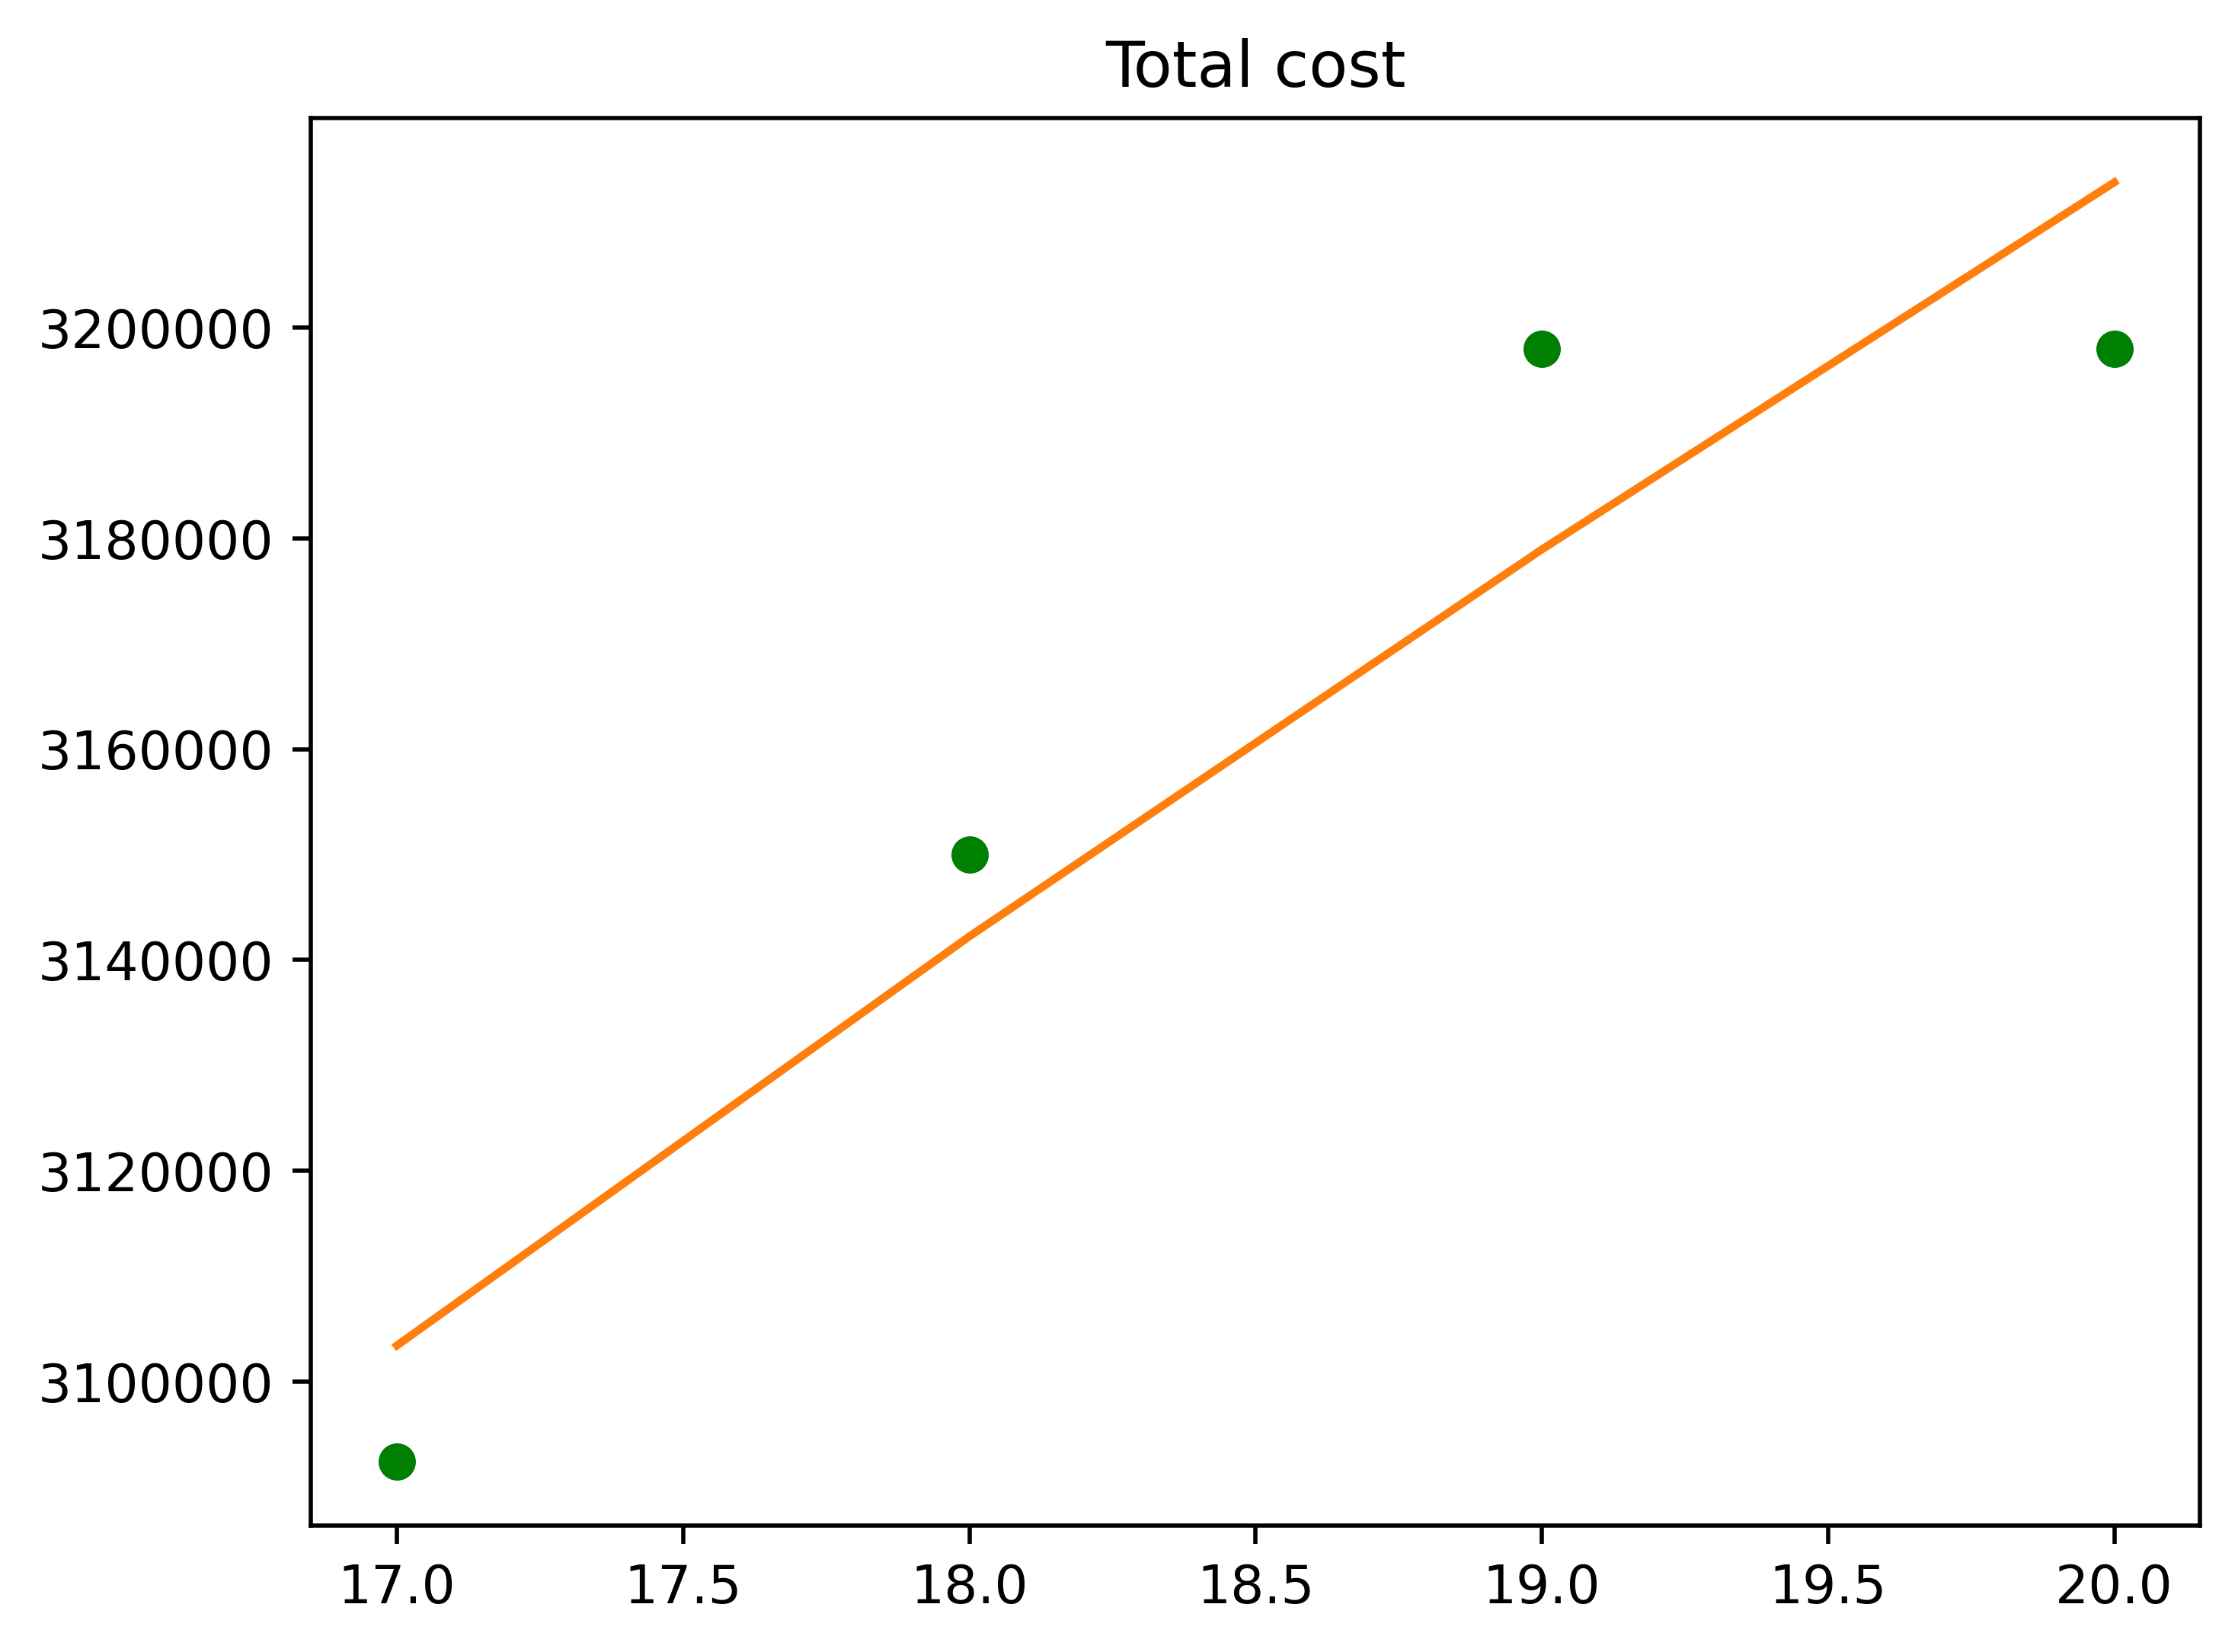

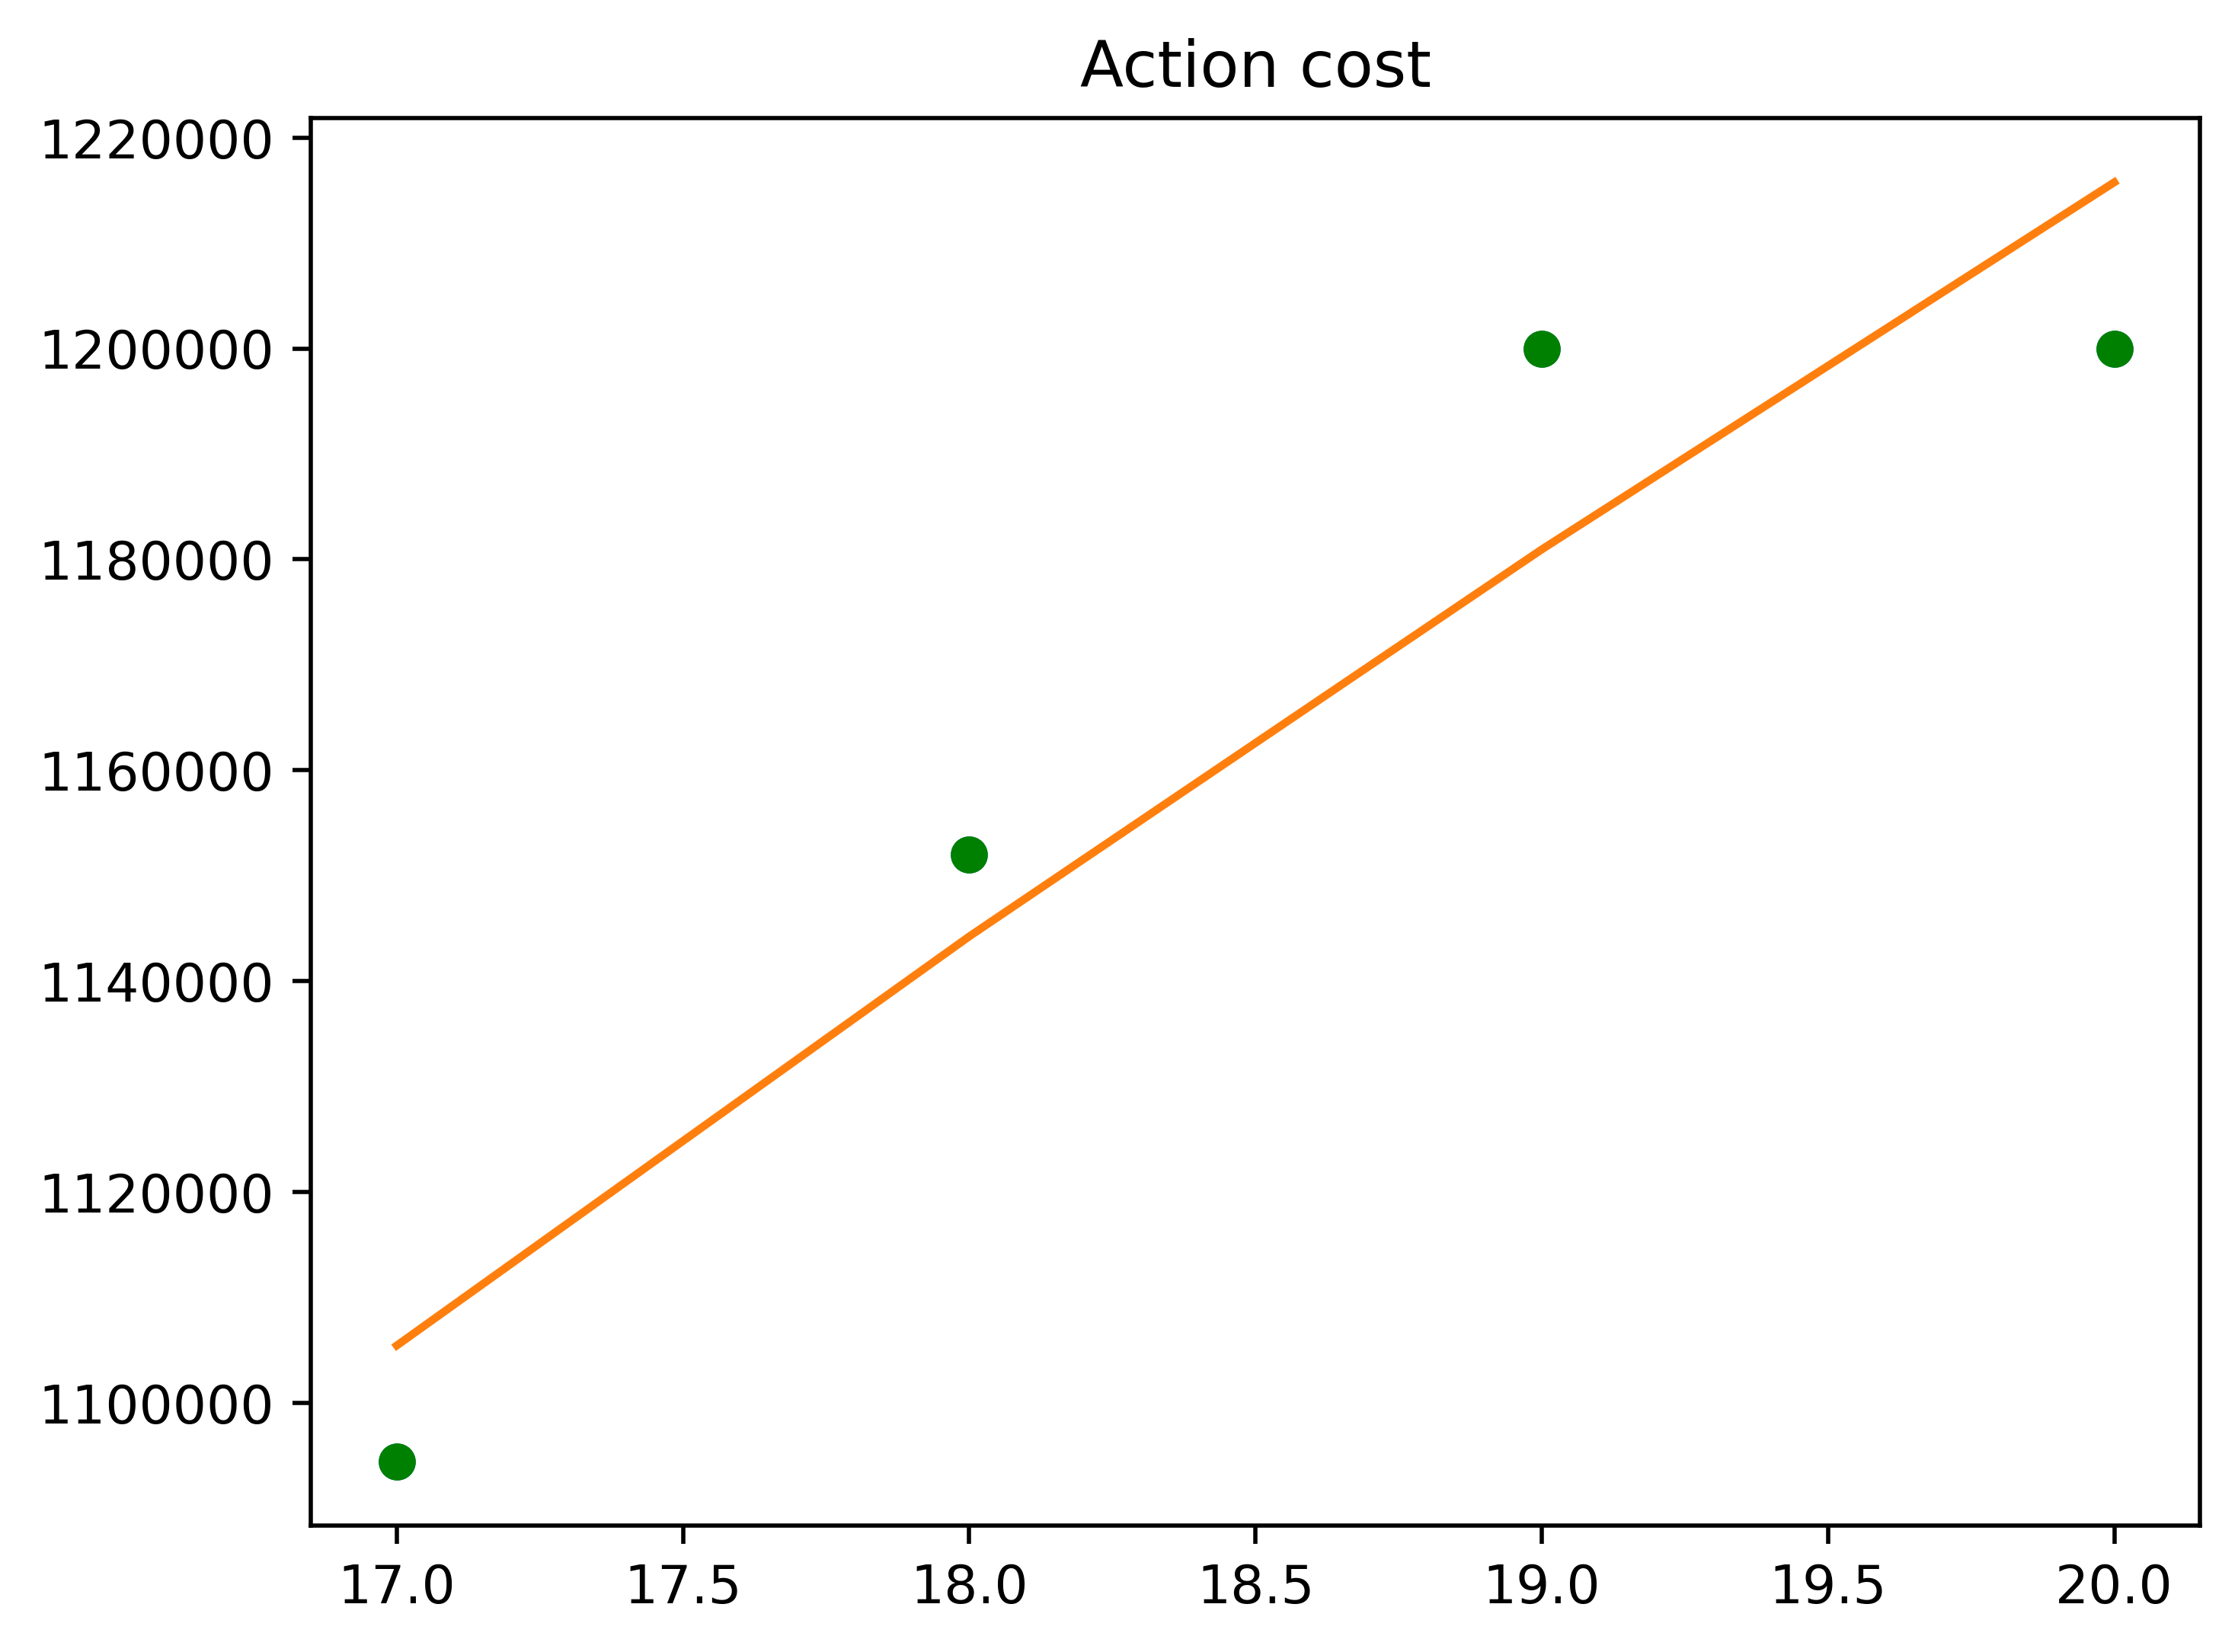

/var/folders/j1/6yngh5c963981fhs_7f6c8zr0000gn/T/ipykernel_65338/829326220.py:67: OptimizeWarning: Covariance of the parameters could not be estimated
  s = scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  arr_x    ,  arr_y)


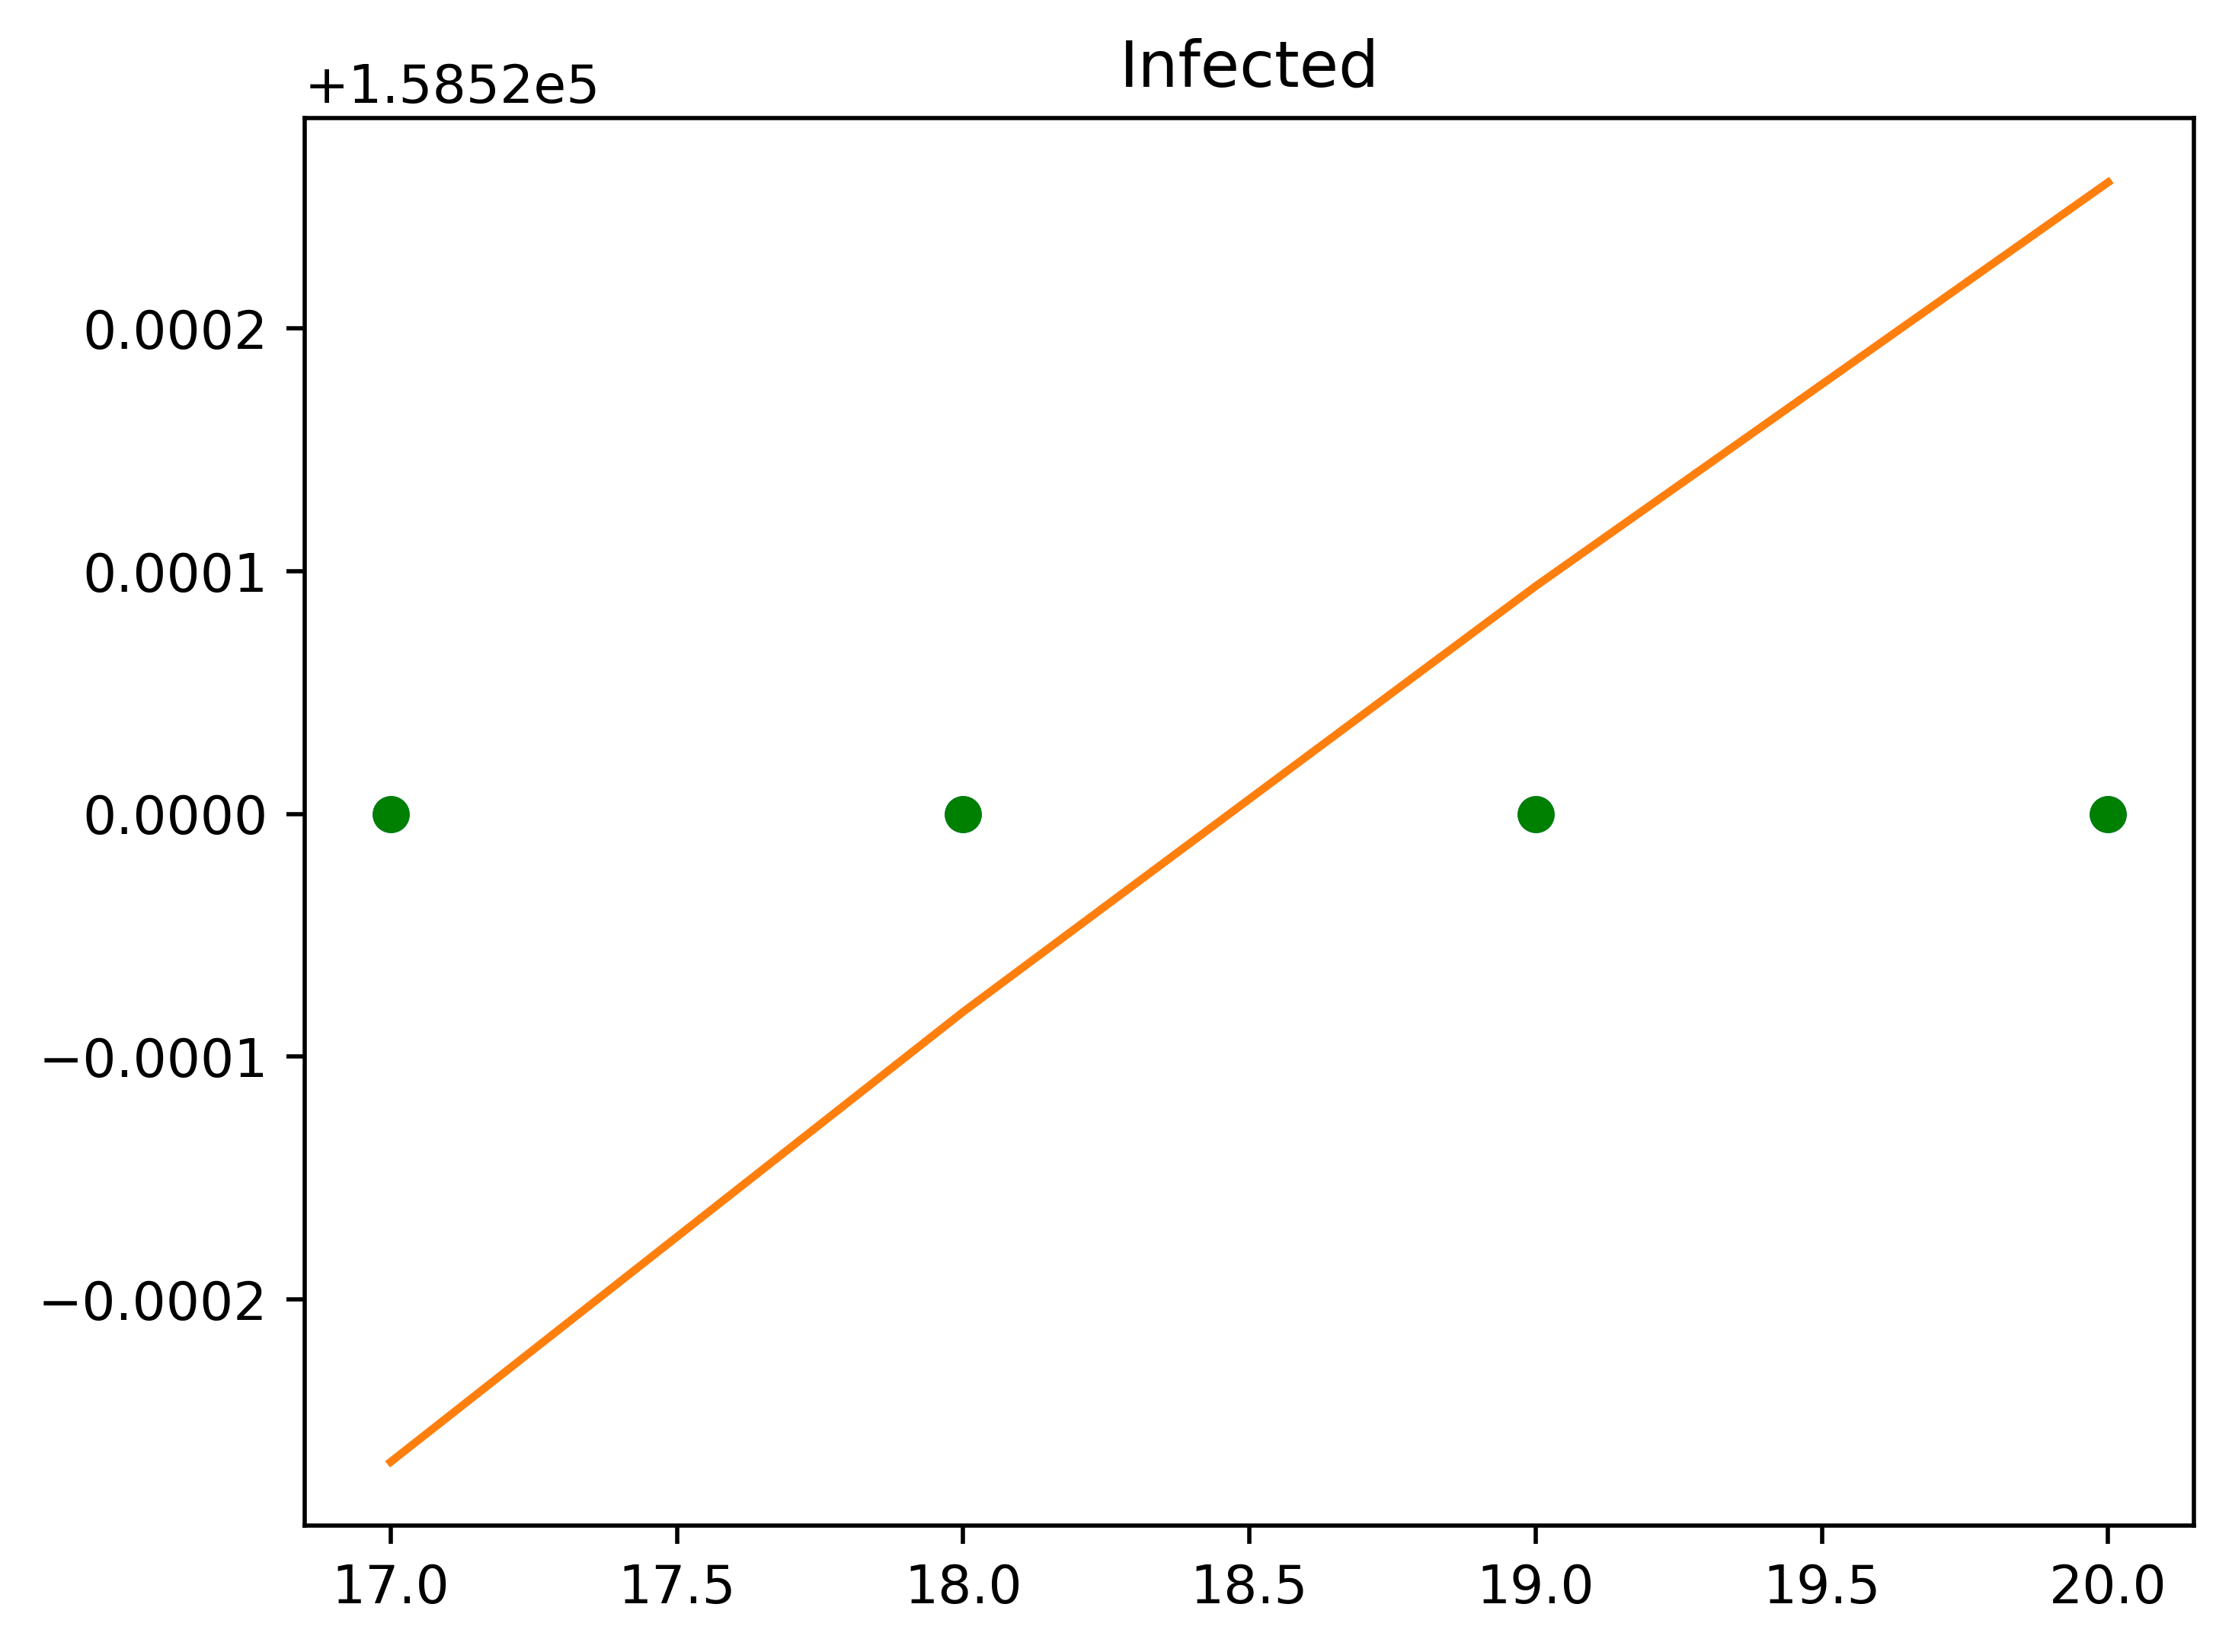

<Figure size 3200x2400 with 0 Axes>

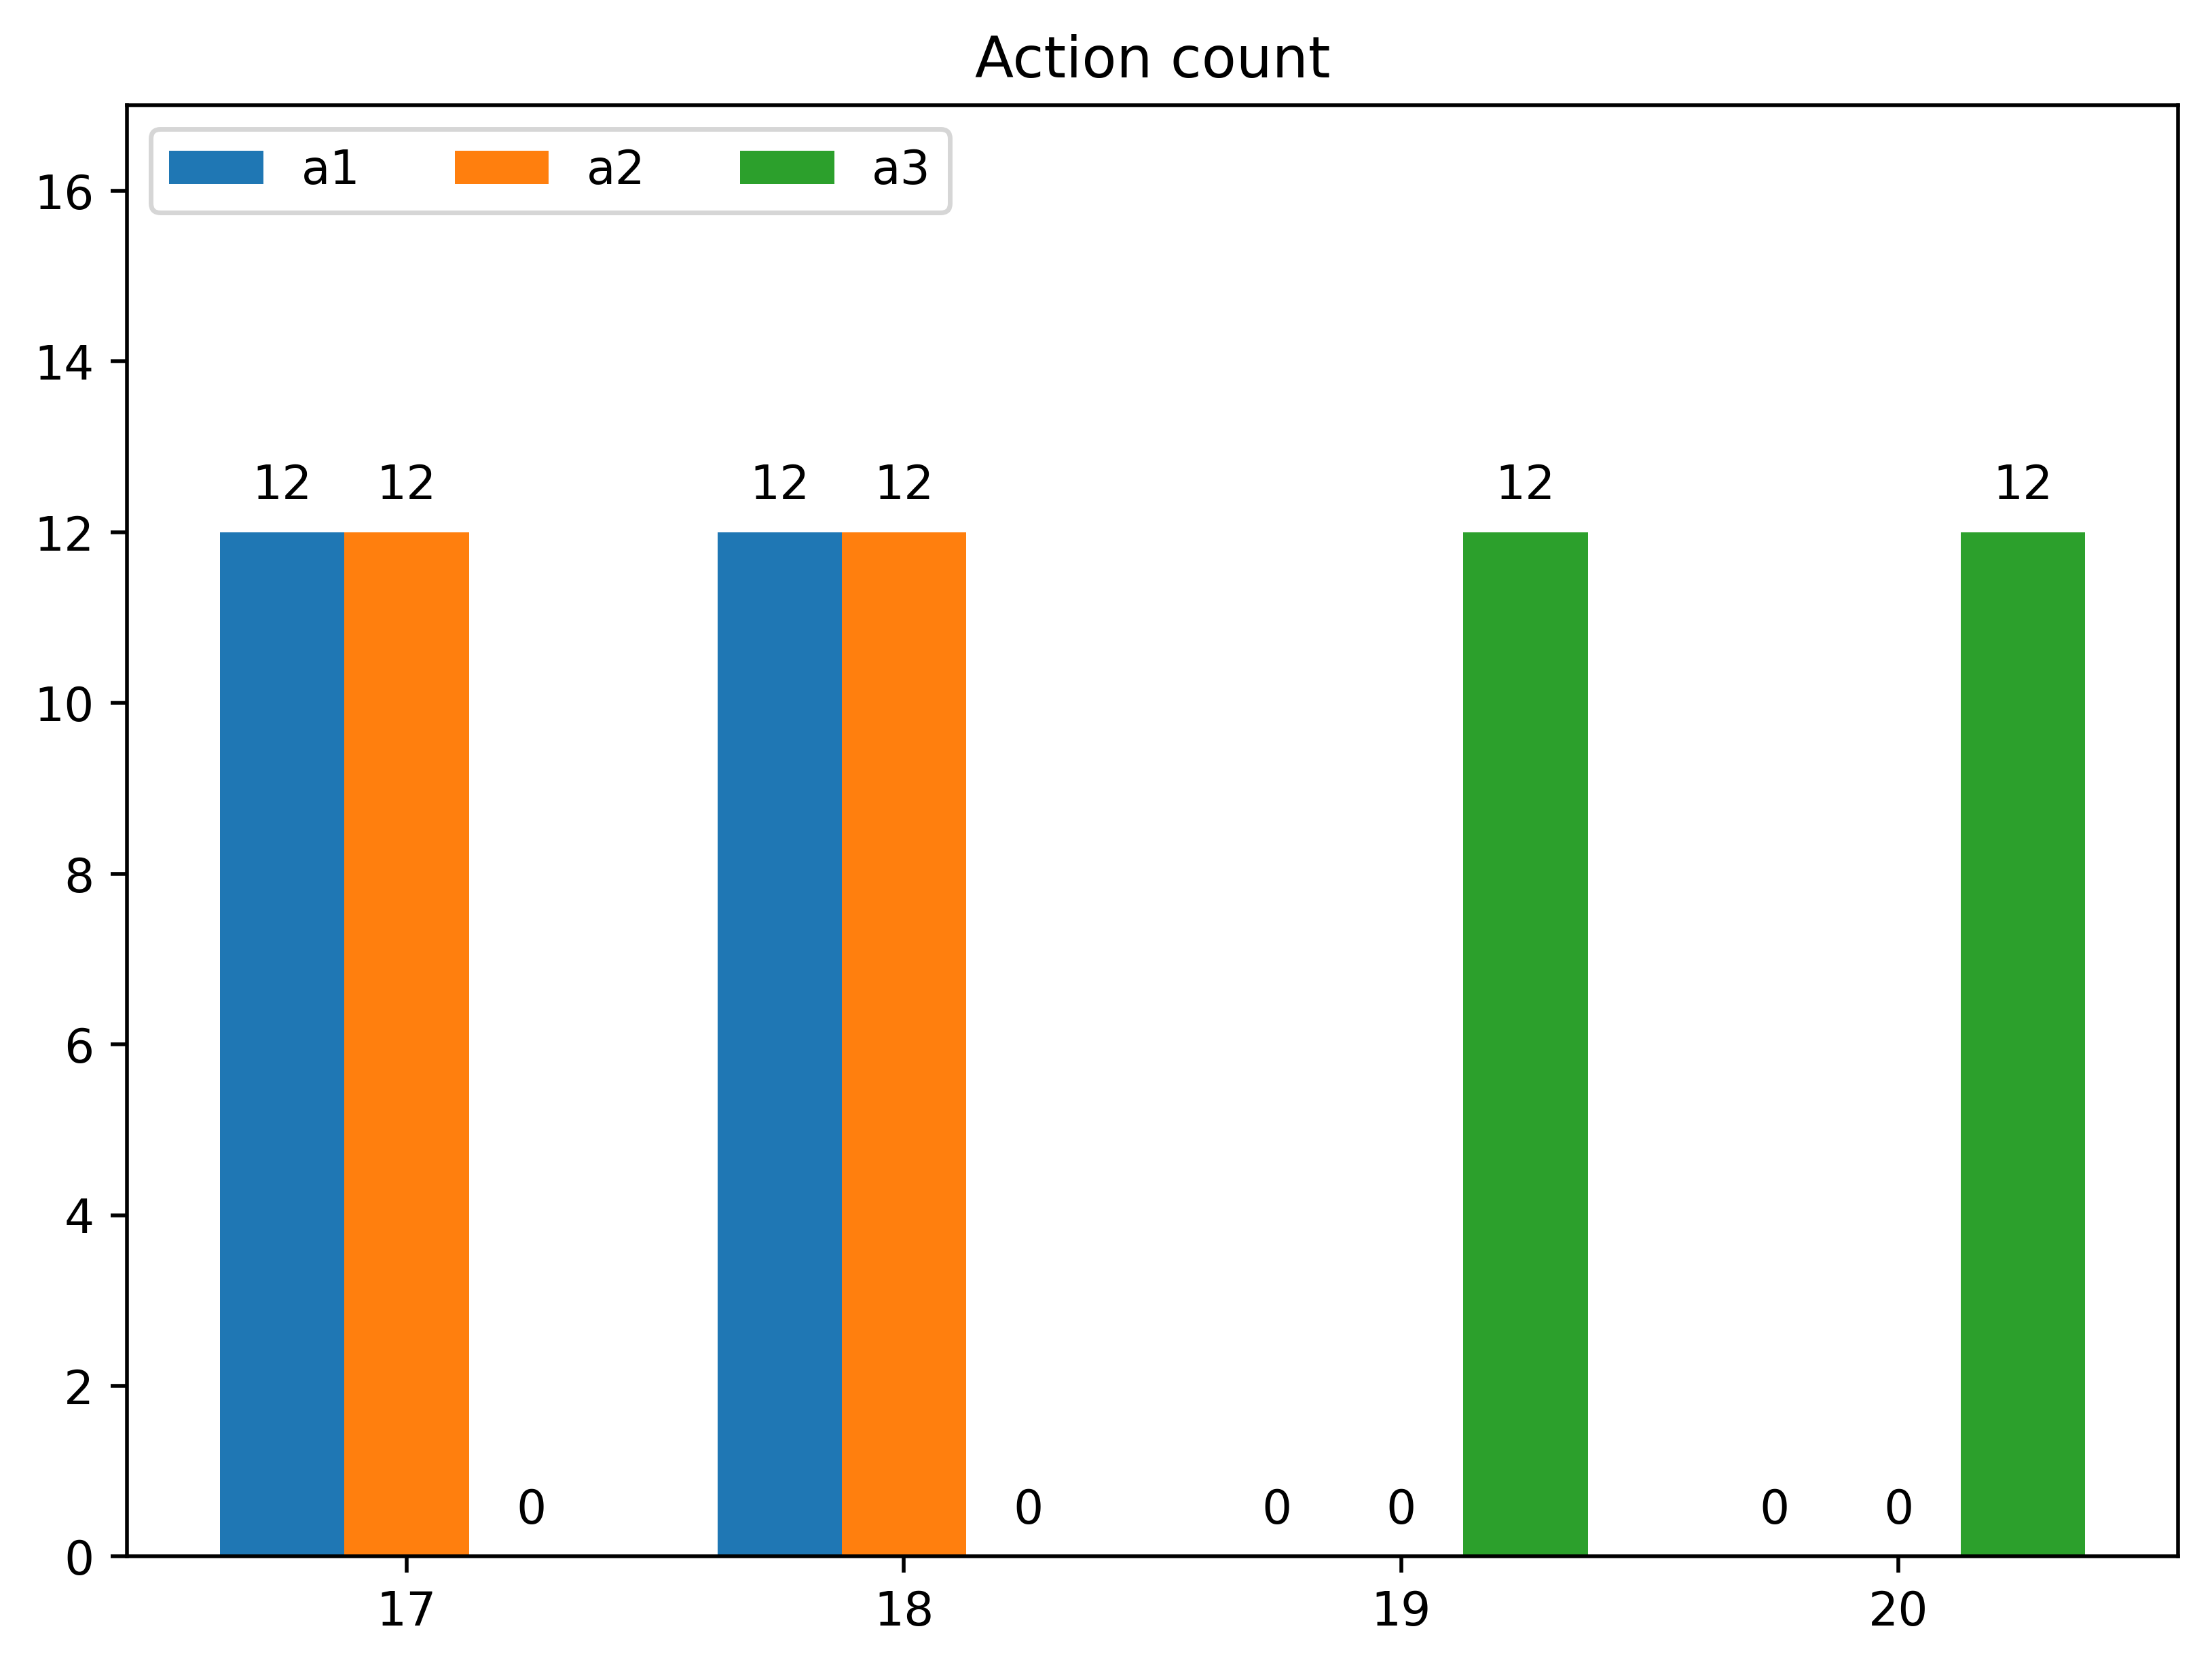

In [19]:
import os
import numpy as np
from matplotlib import pyplot
from matplotlib import pyplot as plt
import pandas as pd
import scipy
from IPython.display import display, Markdown, Latex

# parameter_analisys = 'a3_cost'
parameter_analisys = 'a2_cost'

# base_f = 'Analisi sensibilità/Analisi 1/Salvataggi/a3_cost/Prova_7 seed 2008'
# base_f = 'Analisi sensibilità/Analisi 1/Salvataggi/a2_cost/Finale_1'
# base_f = 'Analisi sensibilità/Analisi 1/Salvataggi/a3_cost/Future Mean seed 2008'
# base_f = 'Analisi sensibilità/Analisi 1/Salvataggi/a3_cost/Future Min random'
# base_f = 'Analisi sensibilità/Analisi 1/Salvataggi/a2_cost/prova2'
base_f = 'Analisi sensibilità/Finale/a2_cost_max_a_round_3'
folders = os.listdir(base_f)

n_of_epoch = 11
total_epochs = 100

figure_dpi = 500
figure_dpi_bool = True



data, full_data = import_data(total_epochs, n_of_epoch, base_f, folders, parameter_analisys)

# Sorting
data.sort(key=lambda x: x['parameter_value'], reverse=False)


def plot_arr(arr_x, arr_y, title, errors=True):

    plt.ticklabel_format(style='plain', axis='y')
    if figure_dpi_bool: pyplot.rcParams['figure.dpi'] = figure_dpi
    plt.plot(arr_x, arr_y, 'o')

    unique_arr_x = np.unique(arr_x)
    unique_arr_dict = {}
    for x in unique_arr_x: unique_arr_dict[x] = []

    for i, y in enumerate(arr_y):
        unique_arr_dict[arr_x[i]].append(y)

    min_arr = []
    for k in unique_arr_dict.keys():
        min_arr.append(min(unique_arr_dict[k]))

    errors_x_arr = []
    errors_arr = []
    for k in unique_arr_dict.keys():
        mean = np.mean(unique_arr_dict[k])
        for el in unique_arr_dict[k]:
            if el > mean:
                errors_x_arr.append(k)
                errors_arr.append(el)   

    m, b = np.polyfit(arr_x, arr_y, 1)

    plt.plot(unique_arr_x, min_arr, 'o', label='Best', color='green')
    plt.title(title)
    if errors: plt.plot(errors_x_arr, errors_arr, 'o', label='Errors', color='red')

    if len(arr_x) > 1:
        s = scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  arr_x    ,  arr_y)
        trend = [(s[0][0] + s[0][1] * np.log(x)) for x in arr_x]
        

        plt.plot(arr_x, trend, label='Total cost trend')
    
    plt.show()
    plt.clf()



def plot_strategy(arr_x, a1_cont, a2_cont, a3_cont):
    
    
    unique_arr_x = np.unique(arr_x)
    unique_arr_dict = {}
    overall_max = 0
    for x in unique_arr_x: unique_arr_dict[x] = {
        'a1': [],
        'a2': [],
        'a3': [],
    }

    plot_dict = {
        'a1': [],
        'a2': [],
        'a3': [],
    }
    for i, x in enumerate(arr_x):
        unique_arr_dict[x]['a1'].append(a1_cont[i])
        unique_arr_dict[x]['a2'].append(a2_cont[i])
        unique_arr_dict[x]['a3'].append(a3_cont[i])
        if a1_cont[i] > overall_max: overall_max = a1_cont[i]
        if a2_cont[i] > overall_max: overall_max = a2_cont[i]
        if a3_cont[i] > overall_max: overall_max = a3_cont[i]
        
    for k in unique_arr_dict.keys():
        plot_dict['a1'].append(np.mean(unique_arr_dict[k]['a1']))
        plot_dict['a2'].append(np.mean(unique_arr_dict[k]['a2']))
        plot_dict['a3'].append(np.mean(unique_arr_dict[k]['a3']))
        
    len_column = np.arange(len(unique_arr_x))
    
    width = 0.25
    multiplier = 0
    fig, ax = plt.subplots(layout='constrained')
    for k, m in plot_dict.items():
        offset = width * multiplier
        rects = ax.bar(len_column + offset, m, width, label=k)
        ax.bar_label(rects, padding=5)
        multiplier += 1
        
            
        
    
    ax.legend(loc='upper left', ncols=3)

    ax.set_title('Action count')
    ax.set_xticks(len_column + width, unique_arr_x)
    ax.set_ylim(0, overall_max + 5)
    plt.show()
    fig.clf()
    

arr_x = []
arr_t_cost= []
arr_a_cost = []
arr_infected = []
arr_a1 = []
arr_a2 = []
arr_a3 = []

for d in data:
    arr_x.append(d['parameter_value'])
    arr_t_cost.append(d['total_cost'])
    arr_a_cost.append(d['action_cost'])
    arr_infected.append(d['infected'])
    arr_a1.append(d['a1'])
    arr_a2.append(d['a2'])
    arr_a3.append(d['a3'])

if figure_dpi_bool: pyplot.rcParams['figure.dpi'] = figure_dpi



plot_arr(arr_x, arr_t_cost, 'Total cost')
plot_arr(arr_x, arr_a_cost, 'Action cost')
plot_arr(arr_x, arr_infected, 'Infected')



plot_strategy(arr_x, arr_a1, arr_a2, arr_a3)


def print_data_mk(full_data, parameter_value, last_n=0):
    
    for data in full_data:
        
        if data['parameter_value'] == parameter_value:
            print(f'Parameter value: {parameter_value}')

            data_to_use = {}
            for el in data['pd_csv_data'].keys():
                data_to_use[el] = data['pd_csv_data'][el]
            


            for el in data_to_use.keys():
                data_to_use[el] = data_to_use[el][1:]
            
            if last_n > 0:
                data_to_use_gen_length = len(data_to_use[list(data_to_use.keys())[0]])
                for el in data_to_use.keys():
                    data_to_use[el] = data_to_use[el][(data_to_use_gen_length - last_n):]

            data_table = pd.DataFrame(data=data_to_use, columns=data_to_use.keys())

            display(Markdown(data_table.to_markdown()))

# Seed: 2002, 2006
    




In [20]:
print_data_mk(full_data, 18, 40)
print_data_mk(full_data, 19, 40)

Parameter value: 18


|    |   Epoch |   Attendance |   Contagion |   Present contagion |   A1 |   A2 |   A3 |   Action on random |   Action on random zero |   Action on max |   Actions | A1 cost   | A2 cost   |   A3 cost | Action cost   |   New infections |   New infected cost | Total cost   |   Total revenues | Epoch txt   |
|---:|--------:|-------------:|------------:|--------------------:|-----:|-----:|-----:|-------------------:|------------------------:|----------------:|----------:|:----------|:----------|----------:|:--------------|-----------------:|--------------------:|:-------------|-----------------:|:------------|
|  0 |      61 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
|  1 |      62 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
|  2 |      63 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
|  3 |      64 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
|  4 |      65 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
|  5 |      66 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
|  6 |      67 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
|  7 |      68 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
|  8 |      69 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
|  9 |      70 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 10 |      71 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 11 |      72 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 12 |      73 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 13 |      74 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 14 |      75 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 15 |      76 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 16 |      77 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 17 |      78 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 18 |      79 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 19 |      80 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 20 |      81 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 21 |      82 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 22 |      83 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 23 |      84 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 24 |      85 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 25 |      86 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 26 |      87 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 27 |      88 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 28 |      89 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 29 |      90 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 30 |      91 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 31 |      92 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 32 |      93 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 33 |      94 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 34 |      95 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 35 |      96 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 36 |      97 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 37 |      98 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 38 |      99 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |
| 39 |     100 |        64994 |       13210 |                3302 |   15 |   15 |    0 |                  0 |                       0 |               1 |         1 | 9600,0    | 86400,0   |         0 | 96000,0       |             1110 |              166500 | 262500,0     |                0 | -           |

Parameter value: 19


|    |   Epoch |   Attendance |   Contagion |   Present contagion |   A1 |   A2 |   A3 |   Action on random |   Action on random zero |   Action on max |   Actions |   A1 cost |   A2 cost |   A3 cost |   Action cost |   New infections |   New infected cost |   Total cost |   Total revenues | Epoch txt   |
|---:|--------:|-------------:|------------:|--------------------:|-----:|-----:|-----:|-------------------:|------------------------:|----------------:|----------:|----------:|----------:|----------:|--------------:|-----------------:|--------------------:|-------------:|-----------------:|:------------|
|  0 |      61 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
|  1 |      62 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
|  2 |      63 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
|  3 |      64 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
|  4 |      65 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
|  5 |      66 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
|  6 |      67 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
|  7 |      68 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
|  8 |      69 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
|  9 |      70 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 10 |      71 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 11 |      72 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 12 |      73 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 13 |      74 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 14 |      75 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 15 |      76 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 16 |      77 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 17 |      78 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 18 |      79 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 19 |      80 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 20 |      81 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 21 |      82 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 22 |      83 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 23 |      84 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 24 |      85 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 25 |      86 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 26 |      87 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 27 |      88 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 28 |      89 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 29 |      90 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 30 |      91 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 31 |      92 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 32 |      93 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 33 |      94 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 34 |      95 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 35 |      96 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 36 |      97 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 37 |      98 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 38 |      99 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |
| 39 |     100 |        71510 |       13210 |                3652 |    0 |    0 |   15 |                  0 |                       0 |               1 |         1 |         0 |         0 |    100000 |        100000 |             1110 |              166500 |       266500 |                0 | -           |